In [2]:
import Structural_analysis as dp
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1
Solving a simple overdetermined system. Supports are named "a", "b",... from left to right. Beams are named "first", "second",... from let to right.
<img src="files/overdetermined1.jpg" style="width: 500px;"/>

In [3]:
a = dp.Support("a", 'fixed', 0, 0)
b = dp.Support("b", 'endpoint', 1, 0)
c = dp.Support("c", "pinned", 2, 0)

first = dp.Beam('first', [a,], [b,],  0.006, 200e6, 0.01, 1, 100)
second = dp.Beam('second', [b,], [c,],  0.006, 200e6, 0.01, 1, 100)

first.set_equations_u()
first.set_equations_w()
second.set_equations_u()
second.set_equations_w()

first.transformation_matrix()
second.transformation_matrix()

first.set_boundry_1()
first.set_boundry_2()
second.set_boundry_1()
second.set_boundry_2()

first.set_boundry_M(first.B_1, a)
first.set_boundry_M(first.B_2, b)

second.set_boundry_M(second.B_1, b)
second.set_boundry_M(second.B_2, c)

first.form_M([a,], [b,])
second.form_M([b,], [c,])

first.set_loading(0, 0)
second.set_loading(0, 0)

a.set_boundryforces(0, 0, 0, 0, 0, 0)
b.set_boundryforces(0, 0, 0, 0, 1000, 0)
c.set_boundryforces(0, 0, 0, 0, 0, 0)

first.form_b([a,],  [b,])
second.form_b([b,],  [c,])

M, b, Naming = dp.main_matrix_formation(
    (first.M, second.M), 
    (first.b, second.b), 
    (first.Naming, second.Naming),  (a, b, c))

r = np.linalg.solve(M, b)

dp.resoult_parsing(r, first, second)

first.calculate_NTM()
second.calculate_NTM()

## Plots for individual beam

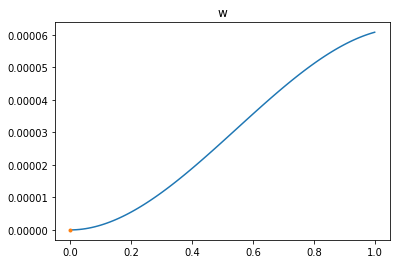

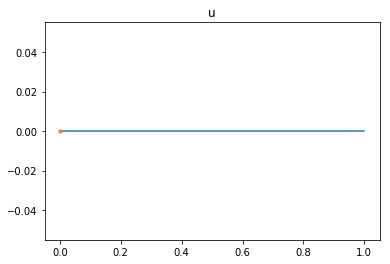

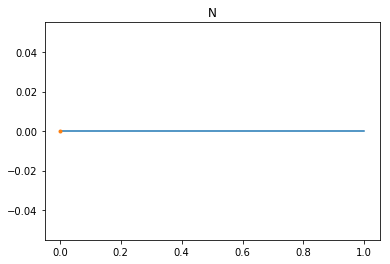

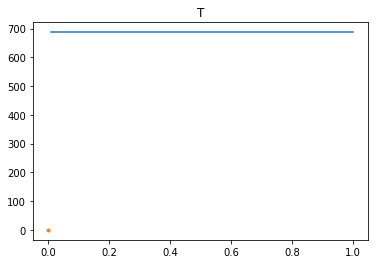

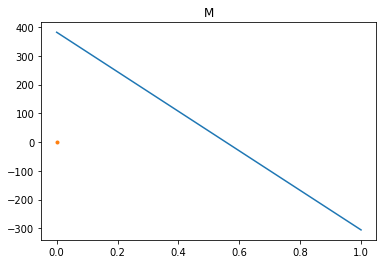

In [4]:
first.drawing()

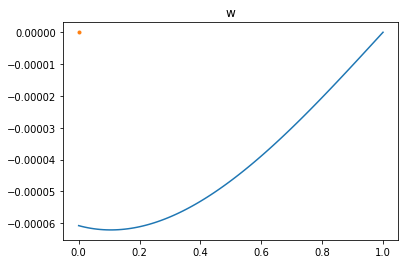

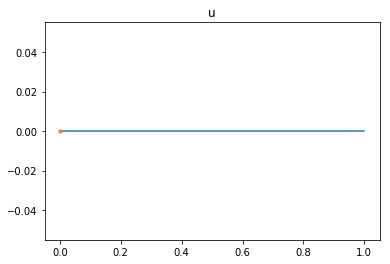

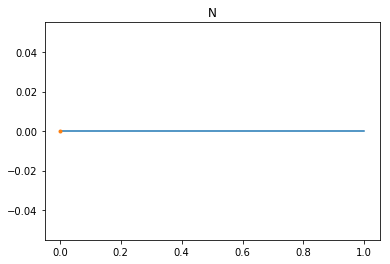

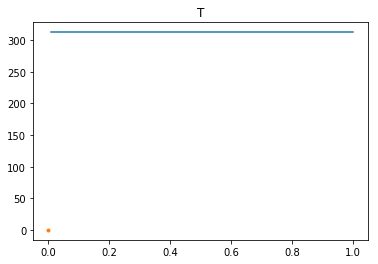

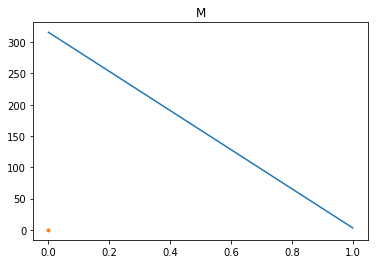

In [5]:
second.drawing()